-----------------------------------

# Ziel:
- Mit Hilfe von Machine Learning Kreditkartenbetrug vorherzusagen.
- Schützt Verbraucher vor Missbrauch und Hilft Banken frühzeitig diesen zu erkennen.

&nbsp;

---------------

# Schritte:
### <span style="color:green">1. Datenverarbeitung</span>
### <span style="color:orange">2. Modelle</span>
### <span style="color:blue">3. Vergleich</span>

&nbsp;

---------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve)
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

np.random.seed(42)

---------------
&nbsp;
# <span style="color:green">1. Datenverarbeitung</span>

&nbsp;

### <span style="color:green">CSV-Datei:</span>


In [3]:
file_path = 'creditcard.csv' 

fraud_data = pd.read_csv(file_path)

fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_data.info()
fraud_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


&nbsp;
### <span style="color:green">Duplikate:</span>

In [5]:
fraud_data.duplicated().sum()

1081

In [6]:
fraud_data = fraud_data.drop_duplicates()
fraud_data.duplicated().sum()

0

&nbsp;
### <span style="color:green">Checken ob Werte fehlen:</span>

In [7]:
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

&nbsp;
### <span style="color:green">Daten standatisieren:</span>
- Labels V1 - V28 bereits durch PCA-Verfahren standatiesert und anonymisiert

In [8]:
scaler = StandardScaler()
fraud_data[['Time', 'Amount']] = scaler.fit_transform(fraud_data[['Time', 'Amount']])
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


&nbsp;

### <span style="color:green">Feature von Labels trennen:</span>


In [9]:
X = fraud_data.drop('Class', axis=1)
y = fraud_data['Class']

&nbsp;

### <span style="color:green">Train-Test-Split:</span>


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

-----------------

&nbsp;

# <span style="color:orange">2. Modelle</span>





&nbsp;

### <span style="color:orange">Balance Check:</span>


In [11]:
fraud_data['Class'].value_counts() #starke unbalance

Class
0    283253
1       473
Name: count, dtype: int64


&nbsp;

### <span style="color:orange">Logistic Regression:</span>      




In [12]:
LG_model_balanced = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42)
LG_model_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

### "solver='lbfgs'"
- Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithmus
- Variante des Newton Verfahrens
- effizient bei großen Datenmengen


&nbsp;

### <span style="color:orange">Smote:</span>
(Synthetic Minority Oversampling Technique)
- erzeugt synthethische Datenpunkte
- für unausgeglichenen Datensatz
- overfitting wird vermieden





In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

LG_model_SMOTE = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
LG_model_SMOTE.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
y_train_resampled.value_counts()

Class
0    226602
1    226602
Name: count, dtype: int64

### "max_iter=1000"
- stoppt wenn Konvergiert (optimale Parameter gefunden)
- oder 1000 mal iteriert (1000mal verschiedene Parameter ausprobiert)

&nbsp;


### <span style="color:orange">Konfusionsmatrix:</span>
- zeigt anzahl der **True-Negatives, False-Positives, False-Negatives, True-Positives**


In [15]:

y_pred_balanced = LG_model_balanced.predict(X_test)
y_pred_SMOTE = LG_model_SMOTE.predict(X_test)

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
cm_SMOTE = confusion_matrix(y_test, y_pred_SMOTE)

print("Konfusionsmatrix-balanced:")
print(cm_balanced)
print()
print("Konfusionsmatrix-SMOTE")
print(cm_SMOTE)

Konfusionsmatrix-balanced:
[[55255  1396]
 [   12    83]]

Konfusionsmatrix-SMOTE
[[55172  1479]
 [   12    83]]


&nbsp;


### <span style="color:orange">Classification-Report</span>

In [16]:
print("LG-balanced:")
print(classification_report(y_test, y_pred_balanced, target_names=["Kein Betrug", "Betrug"]))
print()
print("LG-Smote:")
print(classification_report(y_test, y_pred_SMOTE, target_names=["Kein Betrug", "Betrug"]))

LG-balanced:
              precision    recall  f1-score   support

 Kein Betrug       1.00      0.98      0.99     56651
      Betrug       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


LG-Smote:
              precision    recall  f1-score   support

 Kein Betrug       1.00      0.97      0.99     56651
      Betrug       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



&nbsp;

### <span style="color:orange">Support-Vector-Machine(SVM)</span>

**SVM** ist ein Algorithmus, der eine **optimale Trennlinie** (Hyperplane) sucht, um zwei Klassen bestmöglich zu trennen. Die **Support Vectors** sind die Datenpunkte, die der Trennlinie am nächsten liegen, und die SVM maximiert den Abstand (Margin) zwischen diesen Punkten und der Trennlinie.

### **Wichtige Aspekte:**
1. **Lineare Trennbarkeit**:
   - Bei linearen Daten trennt SVM die Klassen durch eine gerade Linie (2D) oder eine Ebene (höhere Dimensionen).
   
2. **Nicht-lineare Daten**:
   - Bei komplexen Daten wird der **Kernel-Trick** verwendet, um die Daten in einen höherdimensionalen Raum zu transformieren, wo sie linear trennbar sind. Beliebte Kernel sind **RBF** und **polynomial**.

3. **Soft Margin**:
   - Reale Daten enthalten oft Ausreißer oder Überlappungen. SVM verwendet den Parameter **C**, um einen Kompromiss zwischen **fehlertoleranter Trennung** und **strikter Trennung** zu finden.

4. **Klassengewicht**:
   - Für unausgeglichene Datensätze, wie in userem Fall, können Klassen unterschiedlich gewichtet werden (`class_weight='balanced'`), um die Minderheitsklasse zu berücksichtigen.

### **Vorteile:**
- Funktioniert gut bei **hochdimensionalen Daten**.
- Flexibel dank **Kernel-Trick**.
- Robust gegen Überanpassung bei sorgfältiger Parameterwahl.



```Python
svm_model1 = LinearSVC(class_weight={0: 1, 1: 10}, random_state=42, C=0.5, max_iter=10000)
svm_model1.fit(X_train, y_train)

joblib.dump(svm_model1, 'svm_model1.sav') 
```

```Python
svm_model2 = SVC(class_weight='balanced', probability=True, random_state=42, C=0.5, max_iter=10000, kernel='rbf')
svm_model2.fit(X_train, y_train)

joblib.dump(svm_model2, 'svm_model2.sav')
```


Trainingszeit: 10 Min 30 Sek

```Python
svm_model3 = SVC(class_weight={0: 1, 1: 10}, probability=True, random_state=42, C=0.5, max_iter=10000, kernel='rbf')
svm_model3.fit(X_train, y_train)

joblib.dump(svm_model2, 'svm_model3.sav')
```


Trainingszeit: 7 Min 33 Sek

&nbsp;

### SVC:
- **SVC** steht für **Support Vector Classifier**
- eine Implementierung von **SVM** in scikit-learn

&nbsp;

### "class_weight{0: 1, 1: 10}"
- Wir haben diese Gewichtung genommen, da "**class_weight='balanced'**" schlechter abgeschnitten hat und die False-Positives deutlich höher waren

&nbsp;

### <span style="color:orange">Konfusionsmatrix(SVM):</span>

In [17]:
svm_model1 = joblib.load('svm_model1.sav')
y_pred = svm_model1.predict(X_test)

cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)

[[56640    11]
 [   22    73]]


In [18]:
svm_model2 = joblib.load('svm_model2.sav')
y_pred2 = svm_model2.predict(X_test)

cm_SVM = confusion_matrix(y_test, y_pred2)
print(cm_SVM)

[[56471   180]
 [   27    68]]


In [19]:
svm_model3 = joblib.load('svm_model3.sav')
y_pred3 = svm_model3.predict(X_test)

cm_SVM = confusion_matrix(y_test, y_pred3)
print(cm_SVM)

[[56471   180]
 [   27    68]]


&nbsp;

### <span style="color:orange">Classification-Report(SVM):</span>

In [20]:
print(classification_report(y_test, y_pred, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.87      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [21]:
print(classification_report(y_test, y_pred2, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.27      0.72      0.40        95

    accuracy                           1.00     56746
   macro avg       0.64      0.86      0.70     56746
weighted avg       1.00      1.00      1.00     56746



In [22]:
print(classification_report(y_test, y_pred3, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.27      0.72      0.40        95

    accuracy                           1.00     56746
   macro avg       0.64      0.86      0.70     56746
weighted avg       1.00      1.00      1.00     56746



&nbsp;

### <span style="color:orange">Cross-Validation(SVM):</span>

In [23]:
cv_scores = cross_val_score(svm_model1, X_train, y_train, cv=5, scoring='f1')


print(f"F1-Scores für jeden Fold: {cv_scores}")
print(f"Durchschnittlicher F1-Score: {cv_scores.mean()}")

F1-Scores für jeden Fold: [0.80851064 0.80272109 0.80794702 0.80536913 0.86092715]
Durchschnittlicher F1-Score: 0.8170950052870911


&nbsp;

### <span style="color:orange">Grid-Search(SVM):</span>

In [24]:
param_grid = {
    'C': [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100], 
}

grid_search = GridSearchCV(LinearSVC(class_weight={0: 1, 1: 10}, random_state=42, max_iter=1000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Beste F1-Score: {grid_search.best_score_}")

Beste Parameter: {'C': 0.5}
Beste F1-Score: 0.8182429081568483


&nbsp;

### <span style="color:orange">Platt Scaling:</span>

**Platt Scaling** ist eine Methode, um die Ausgaben eines Klassifikationsmodells wie **SVM** in **Wahrscheinlichkeiten** umzuwandeln. Standardmäßig gibt z. B. `LinearSVC` nur binäre Entscheidungen (0 oder 1) zurück, aber Platt Scaling ermöglicht **Soft Classification**.


### **Warum ist Platt Scaling wichtig?**
- **Schwellenwert-Anpassung:** Ermöglicht, den Schwellenwert flexibel zu setzen (z. B. 0.3 statt 0.5).
- **Wahrscheinlichkeiten für Metriken:** Erforderlich für ROC- oder Precision-Recall-Kurven.
- **Konfidenzbewertung:** Liefert mehr Informationen über die Sicherheit einer Vorhersage.


```Python
plattSC_svm_model1 = CalibratedClassifierCV(svm_model1, method='sigmoid', cv=5)
plattSC_svm_model1.fit(X_train, y_train)

joblib.dump(plattSC_svm_model1, 'plattSC_svm_model1.sav')
```

In [25]:
plattSC_svm_model1 = joblib.load('plattSC_svm_model1.sav')
y_pred_proba_plattSC = plattSC_svm_model1.predict_proba(X_test)[: ,1]

In [26]:
y_pred_plattSC = (y_pred_proba_plattSC >= 0.04).astype(int)

print(classification_report(y_test, y_pred_plattSC, target_names=["Kein Betrug", "Betrug"]))

              precision    recall  f1-score   support

 Kein Betrug       1.00      1.00      1.00     56651
      Betrug       0.87      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [27]:
threshold = 0.04
y_pred_plattSC_binary = (y_pred_proba_plattSC >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_plattSC_binary)
print(cm)

[[56640    11]
 [   22    73]]


-----------------

&nbsp;

# <span style="color:blue">3. Vergleich</span>





### <span style="color:blue">Precison-Recall-Curve (PR-Kurve):</span>
- gut bei unausgeglichenen Daten (definitv besser als ROC-Kurve)
- zeigt Trade-off zwischen Precision und Recall anhand von Schwellenwerten
- wo Kurve sehr hoch ist, bester Schwellenwert (Precision und Recall gut)
- konzentriert sich auf positive Klasse (Betrug)

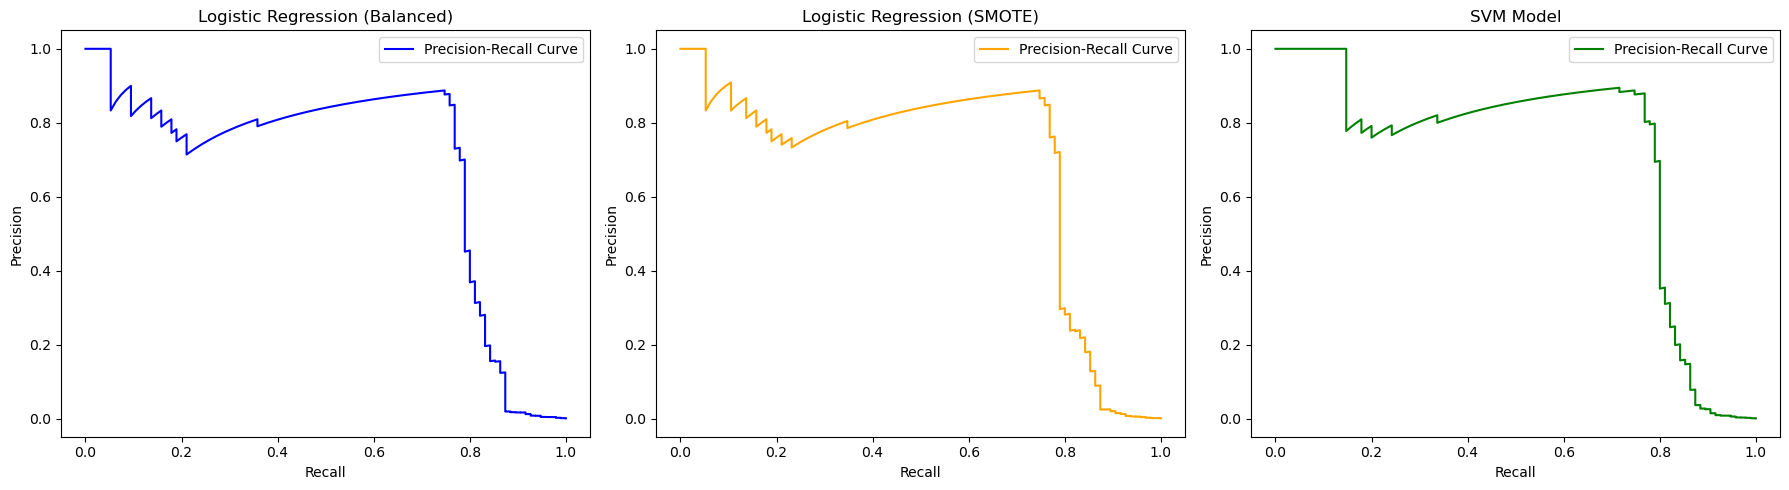

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_pred_proba_balanced = LG_model_balanced.decision_function(X_test)
precisions_balanced, recalls_balanced, thresholds_balanced = precision_recall_curve(y_test, y_pred_proba_balanced)

y_pred_proba_smote = LG_model_SMOTE.decision_function(X_test)
precisions_smote, recalls_smote, thresholds_smote = precision_recall_curve(y_test, y_pred_proba_smote)

y_pred_proba_svm = svm_model1.decision_function(X_test)
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_proba_svm)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].plot(recalls_balanced, precisions_balanced, label="Precision-Recall Curve", color='blue')
axes[0].set_title("Logistic Regression (Balanced)")
axes[0].set_xlabel("Recall")
axes[0].set_ylabel("Precision")
axes[0].legend()

axes[1].plot(recalls_smote, precisions_smote, label="Precision-Recall Curve", color='orange')
axes[1].set_title("Logistic Regression (SMOTE)")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend()


axes[2].plot(recalls_svm, precisions_svm, label="Precision-Recall Curve", color='green')
axes[2].set_title("SVM Model")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].legend()

plt.tight_layout()
plt.show()


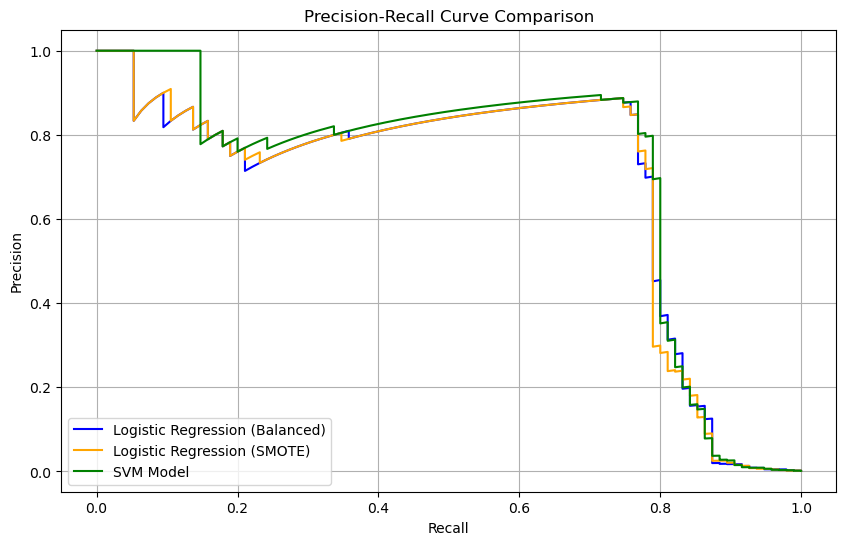

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_pred_proba_balanced = LG_model_balanced.decision_function(X_test)
precisions_balanced, recalls_balanced, _ = precision_recall_curve(y_test, y_pred_proba_balanced)

y_pred_proba_smote = LG_model_SMOTE.decision_function(X_test)
precisions_smote, recalls_smote, _ = precision_recall_curve(y_test, y_pred_proba_smote)

y_pred_proba_svm = svm_model1.decision_function(X_test)
precisions_svm, recalls_svm, _ = precision_recall_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 6))

plt.plot(recalls_balanced, precisions_balanced, label="Logistic Regression (Balanced)", color='blue')

plt.plot(recalls_smote, precisions_smote, label="Logistic Regression (SMOTE)", color='orange')

plt.plot(recalls_svm, precisions_svm, label="SVM Model", color='green')

plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()  
plt.grid()  
plt.show()
